<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week4/regression_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Here we will examine if we can predict the price of a houses in Iowa given some of the house features.

## Loading the data

Read the data file into a Pandas DataFrame called `home_data`.

In [ ]:
import pandas as pd

# Path of the file to read
data_path = "https://raw.githubusercontent.com/ahmadajal/DM_ML_course_public/master/4.%20Regression/in_class_exercises/train.csv"
home_data = pd.read_csv(data_path)

print("Setup Complete")
home_data.head()

Setup Complete


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We will select the **features** which by convention are called **X**. We will also choose the target variable which we typically call `y`.

In [ ]:
feature_names = ['1stFlrSF']
X = home_data[feature_names]
y = home_data["SalePrice"]

In [ ]:
X.head()

,1stFlrSF
0,856
1,1262
2,920
3,961
4,1145


In [ ]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

We create the linear model. 

In [ ]:
# do the right imports
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# Fit the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

and we do the predictions:

In [ ]:
predictions = model.predict(X)
print(predictions)

[142745.979416   193293.23203759 150714.01923813 ... 184080.18599326
 170385.11754899 192546.22830427]


and we can plot the data and the regression.

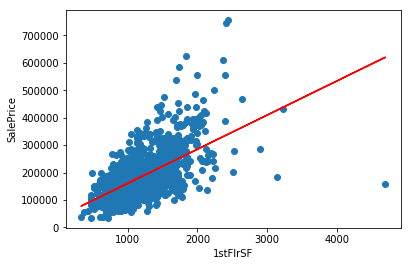

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X.iloc[:,0], y)
plt.plot(X.iloc[:,0], predictions, 'r')
plt.xlabel(X.columns[0])
plt.ylabel('SalePrice')
plt.show()

How much is the model's $MAE$ and $R^2$ ?

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

predicted_home_prices = model.predict(X)
mae = mean_absolute_error(y, predicted_home_prices)
r2 = r2_score(y, predicted_home_prices)

print("MAE %.2f" % mae)
print("R^2 %.2f" % r2)

MAE 44926.49
R^2 0.31


In [ ]:
%reset

# Exercises

Now it's your turn! Make 2 linear regressions:

    A. Between on the columns `OverallQual` and  the `SalePrice`.
    B. Between `FullBath` and  the `SalePrice`.
    
<br>
**Which has the lowest MAE and $R^2$?**


## Step 0: We load the dataset and the necessary files

In [ ]:
# import pandas
import 

# change to GET THE RAW FILE FROM GITHUB. WILL PROVIDE...
data_path = "train.csv"

# read the file using pandas
home_data = 

In [ ]:
# how many observations we have? Hint: use the `shape` attribute
# how many columns are there?

print("Number of observations", ---)
print("Number of dimensions", ---)




## Step 1: Specify Prediction Target
Select the target variable (what we want to predict), which corresponds to the **sales price**. Save this to a new variable called `y`. You'll need to print a list of the columns to find the name of the column you need.

In [ ]:
# print the list of columns in the dataset to find the name of the prediction target


In [ ]:
# store in y the column with the target variable 
# y = 

## Step 2: Create X
Now you will create a DataFrame called **`X`** holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in `X`.

There are a number of numerical columns that you can use:
 * LotArea
  * YearBuilt
  * 1stFlrSF
  * 2ndFlrSF
  * FullBath
  * BedroomAbvGr
  * TotRmsAbvGrd
  * OverallQual

However, for now just use either `FullBath` or `OverallQual`.

After you've created that list of features, use it to create the DataFrame that you'll use to fit the model.

In [ ]:
# Create the list of features below
feature_names = 

# select data corresponding to features in feature_names
X = 

## Review Data
Before building a model, take a quick look at **X** to verify it looks sensible

In [ ]:
# Review data
# print description or statistics from X


# print the top few lines of X


## Step 3: Specify and Fit Model
Create a `LinearRegression` model and save it as `iowa_model`. Ensure you've done the relevant import from sklearn to run this command.

Then fit the model you just created using the data in `X` and `y` that you saved above.

In [ ]:
# do the right imports
from sklearn.linear_model import LinearRegression

# create the model
iowa_model = LinearRegression()

# Fit the model
iowa_model.fit(X,y)


Which are the **parameters** of the model?

In [ ]:
print(f'intercept = {iowa_model.intercept_}')
print(f'coefficients = {iowa_model.coef_}')

## Step 4: Make Predictions

Make predictions with the model's `predict` command using `X` as the data. Save the results to a variable called `predictions`.

In [ ]:
predictions = _
print(predictions)

## Show the regression

Now show the regression.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(--, --)
plt.plot(---, predictions, 'r')
plt.xlabel(X.columns[0])
plt.ylabel('SalePrice')
plt.show()

## Model Validation

You've built a model. But how good is it?

The prediction error for each house is:  `error=|actual−predicted|`

So, if a house cost CHF 150'000 and you predicted it would cost CHF 100'000 the error is  CHF 50'000.

We call this **MAE** (Mean Average Error) and to get a single number we can average the errors for all the houses.

### Compute the MAE and the $R^2$ of the two models. 

For which feature
   - FullBath
   - OverQual
 
do we have the lowest MAE?

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

predicted_home_prices = 
mae = 
r2 = 

print("MAE %.2f" % mae)
print("R^2 %.2f" % r2)

So, on average we are off by some CHF 30k-46k on the predicted price. But this is for the "in-sample" points. 

However, in practice **should always** evaluate the quality of our model on datapoints that were not used to create the model. We will see how this can be done later.